In [1]:
#!jt -t monokai -T -N -kl
#!jt -r

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [3]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 12)
#plt.style.use('dark_background')
plt.style.use('ggplot')

In [4]:
url_country = 'https://github.com/datasets/covid-19/raw/master/data/countries-aggregated.csv'
country_df = pd.read_csv(url_country)[['Date', 'Country', 'Deaths']]

In [5]:
W = pd.DataFrame(country_df.groupby('Date').sum())
W['Country'] = ['World' for _ in range(len(W))]
W['Date'] = W.index
country_df = country_df.append(W)

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [6]:
Deaths = pd.DataFrame()
Deaths['Date'] = country_df.Date.unique()
Deaths['Date'] = pd.to_datetime(Deaths.Date)
#Deaths = Deaths.set_index('Date')

In [7]:
countries = country_df['Country'].unique()
for c in countries:
    cun = country_df[country_df.Country == c].Deaths
    Deaths[c] = list(cun)
Deaths = Deaths.set_index('Date')

In [8]:
Important_countries = ['India', 'World', #'World without China',
                      'US', 'Germany', 'Italy', 'Spain', 'China',
                      'United Kingdom', 'France',
                      'Korea, South', 'Iran']#[::-1]
colors = {'India': 'Blue', 'World': 'Blue', 'World without US': 'Green', 'US': 'Black', 'China': 'red', 'Spain': 'yellow',
         'Italy': 'grey', 'Iran': 'brown', 'Ireland': 'violet', 'United Kingdom': 'Purple', 'Korea, South': 'Black',
         'France': 'orange', 'Germany': 'Green'}
def plotter(DF, name, log = True):
    plt.figure(figsize = (14, 7))
    if log:
        if log == 'symlog':
            plt.yscale('symlog')
        else:
            plt.yscale('log')
    if len(DF.columns)>len(Important_countries):
        columns = Important_countries
    else:
        columns = DF.columns
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 #alpha = 0.6
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend()
    plt.show()

In [9]:
def plot2(DF, DF2, name1, name2 = 'Deaths', log = True):
    plt.figure(figsize = (14, 7))
    if log:
        plt.xscale('log')
        if log == 'symlog':
            plt.yscale('symlog')
        else:
            plt.yscale('log')
    for col in Important_countries:
        plt.plot(DF[col],
                 DF2[col],
                 label = col,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 #alpha = 0.6
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend()
    plt.show()

In [10]:
Deaths.tail(14)[Important_countries]

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-14,393,126071,25843,3294,21067,18056,3345,12129,15748,222,4683
2020-04-15,405,134234,28338,3804,21645,18708,3346,12894,17188,225,4777
2020-04-16,448,143853,32930,4052,22170,19315,3346,13759,17941,229,4869
2020-04-17,486,153897,36787,4352,22745,20002,4636,14607,18703,230,4958
2020-04-18,521,159615,38664,4459,23227,20043,4636,15498,19345,232,5031
2020-04-19,559,165081,40661,4586,23660,20453,4636,16095,19744,234,5118
2020-04-20,592,170013,42094,4862,24114,20852,4636,16550,20292,236,5209
2020-04-21,645,176729,44444,5033,24648,21282,4636,17378,20829,237,5297
2020-04-22,681,183180,46622,5279,25085,21717,4636,18151,21373,238,5391


c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


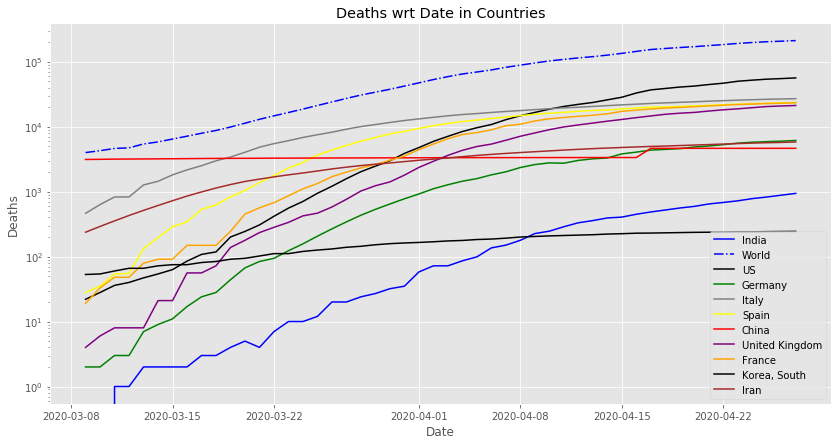

In [11]:
plotter(Deaths[Important_countries].tail(50), 'Deaths')

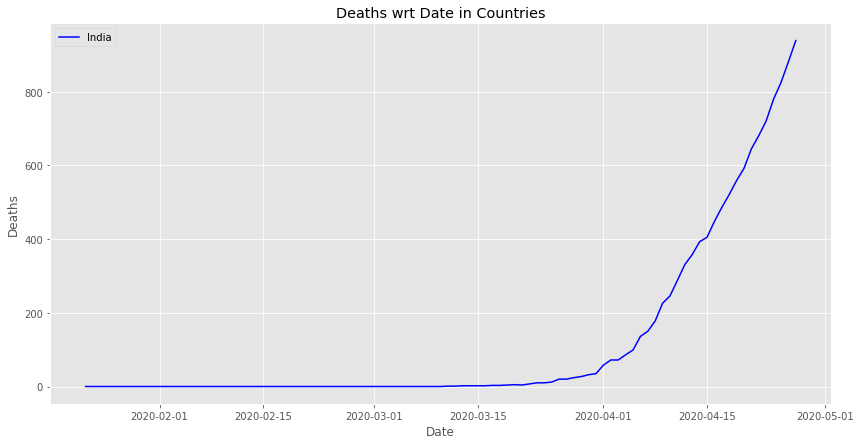

In [12]:
plotter(Deaths[['India']], 'Deaths', False)
#Deaths[['India']].tail(50)

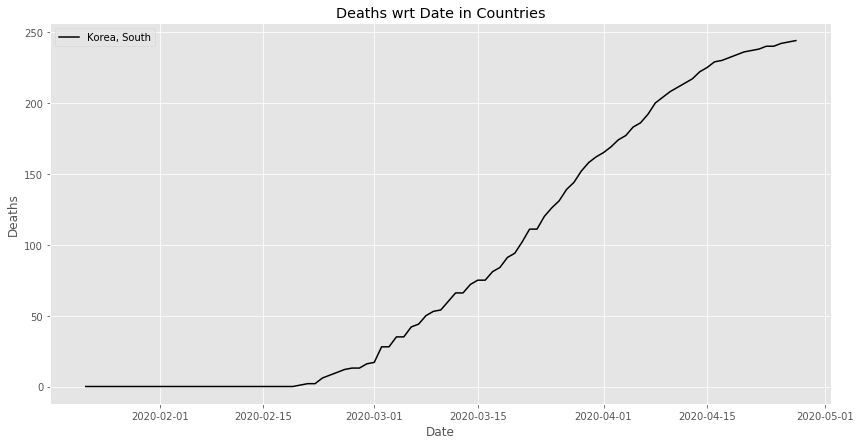

In [13]:
plotter(Deaths[['Korea, South']], 'Deaths', False)

In [14]:
Removed = np.round(Deaths/0.02).astype('int')
Removed[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-14,19650,6303550,1292150,164700,1053350,902800,167250,606450,787400,11100,234150
2020-04-15,20250,6711700,1416900,190200,1082250,935400,167300,644700,859400,11250,238850
2020-04-16,22400,7192650,1646500,202600,1108500,965750,167300,687950,897050,11450,243450
2020-04-17,24300,7694850,1839350,217600,1137250,1000100,231800,730350,935150,11500,247900
2020-04-18,26050,7980750,1933200,222950,1161350,1002150,231800,774900,967250,11600,251550
2020-04-19,27950,8254050,2033050,229300,1183000,1022650,231800,804750,987200,11700,255900
2020-04-20,29600,8500650,2104700,243100,1205700,1042600,231800,827500,1014600,11800,260450
2020-04-21,32250,8836450,2222200,251650,1232400,1064100,231800,868900,1041450,11850,264850
2020-04-22,34050,9159000,2331100,263950,1254250,1085850,231800,907550,1068650,11900,269550


In [15]:
Biweekly_Deaths = Deaths - Deaths.shift(14)
Biweekly_Deaths = Biweekly_Deaths.fillna(0).astype('int')
Biweekly_Deaths[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-14,358,83962,21969,2519,8639,9592,36,10336,12216,60,1785
2020-04-15,347,87043,23578,2884,8490,9321,30,10537,12774,60,1741
2020-04-16,376,90854,27001,2945,8255,8967,24,10833,12543,60,1709
2020-04-17,414,95097,29697,3077,8064,8804,1310,10996,12183,56,1664
2020-04-18,435,94989,30256,3015,7865,8096,1306,11178,11771,55,1579
2020-04-19,460,95692,31042,3002,7773,7812,1303,11152,11651,51,1515
2020-04-20,456,95417,31311,3052,7591,7511,1301,11165,11366,50,1470
2020-04-21,495,94776,31650,3017,7521,7237,1301,11207,10486,45,1425
2020-04-22,503,94800,31918,2930,7416,6925,1299,11040,10486,38,1398


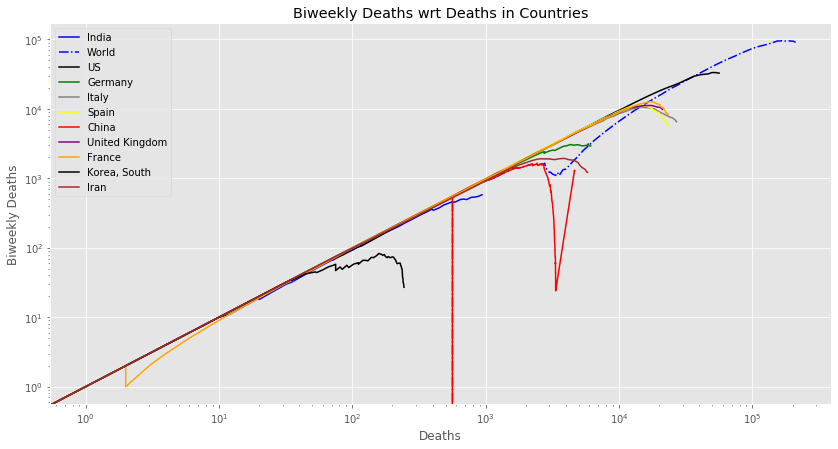

In [16]:
plot2(Deaths, Biweekly_Deaths, 'Biweekly Deaths')

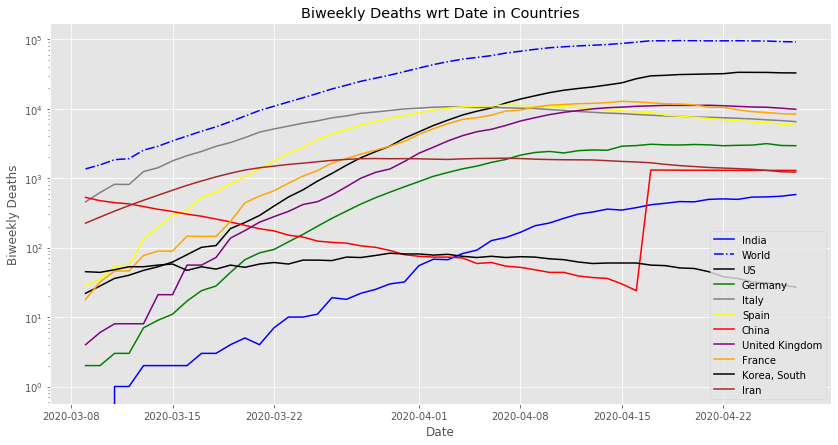

In [17]:
plotter(Biweekly_Deaths[Important_countries].tail(50), 'Biweekly Deaths', True)

In [18]:
# Biweekly increase in biweekly deaths
Increase_Biweekly = Biweekly_Deaths-Biweekly_Deaths.shift(14)
Increase_Biweekly = Increase_Biweekly.fillna(0).astype('int')
Increase_Biweekly[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-14,326,49758,18203,1768,-1286,1661,-43,8599,8833,-21,-125
2020-04-15,292,48585,18936,1992,-1687,557,-45,8252,8509,-21,-160
2020-04-16,308,47722,21272,1882,-2255,-551,-49,8045,7389,-18,-167
2020-04-17,347,47597,22851,1869,-2585,-1351,1237,7563,6114,-24,-197
2020-04-18,353,43336,22155,1655,-2672,-2476,1235,7092,4760,-20,-317
2020-04-19,368,40955,21840,1512,-2638,-3057,1244,6491,4234,-21,-403
2020-04-20,330,37327,21085,1365,-2855,-3519,1240,6116,3302,-25,-457
2020-04-21,355,31449,19562,1158,-2786,-4000,1247,5459,1245,-27,-513
2020-04-22,337,27602,18156,787,-2750,-4220,1247,4395,932,-36,-518


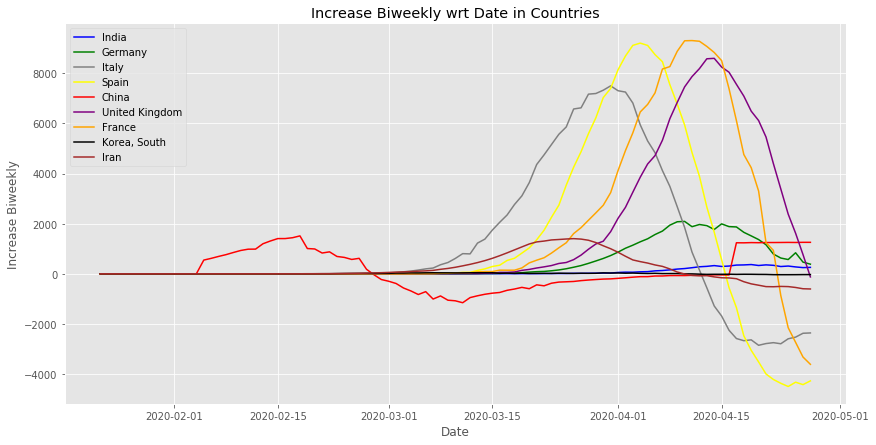

In [19]:
plotter(Increase_Biweekly[[c for c in Important_countries if c not in ['World', 'US']]], 'Increase Biweekly', False)

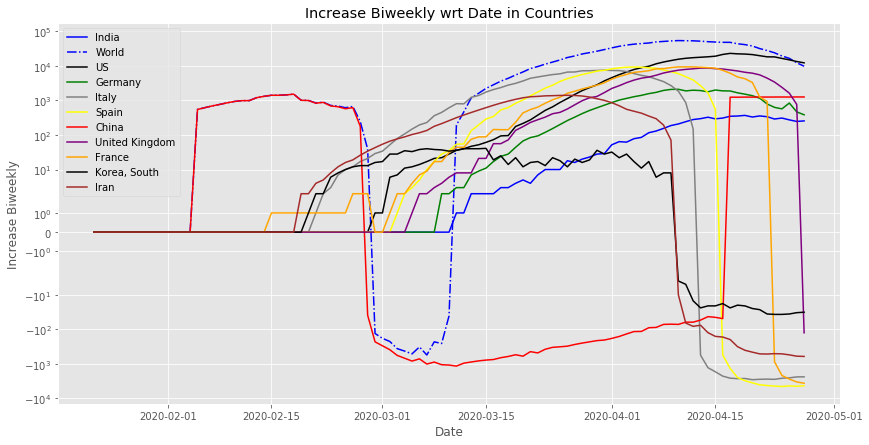

In [20]:
plotter(Increase_Biweekly, 'Increase Biweekly', log = 'symlog')

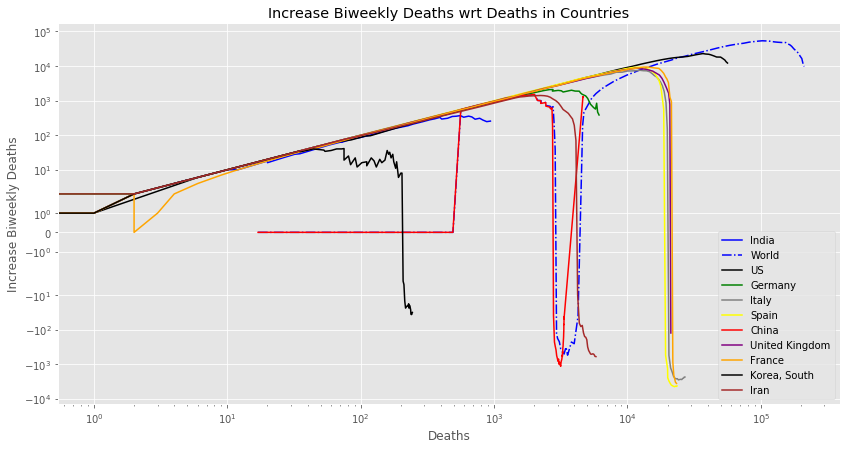

In [21]:
plot2(Deaths, Increase_Biweekly, 'Increase Biweekly Deaths', log = 'symlog')

In [22]:
Slope = np.round(Increase_Biweekly/Biweekly_Deaths, 4)
Slope[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-14,0.9106,0.5926,0.8286,0.7019,-0.1489,0.1732,-1.1944,0.8319,0.7231,-0.3500,-0.0700
2020-04-15,0.8415,0.5582,0.8031,0.6907,-0.1987,0.0598,-1.5000,0.7831,0.6661,-0.3500,-0.0919
2020-04-16,0.8191,0.5253,0.7878,0.6390,-0.2732,-0.0614,-2.0417,0.7426,0.5891,-0.3000,-0.0977
2020-04-17,0.8382,0.5005,0.7695,0.6074,-0.3206,-0.1535,0.9443,0.6878,0.5018,-0.4286,-0.1184
2020-04-18,0.8115,0.4562,0.7323,0.5489,-0.3397,-0.3058,0.9456,0.6345,0.4044,-0.3636,-0.2008
2020-04-19,0.8000,0.4280,0.7036,0.5037,-0.3394,-0.3913,0.9547,0.5820,0.3634,-0.4118,-0.2660
2020-04-20,0.7237,0.3912,0.6734,0.4472,-0.3761,-0.4685,0.9531,0.5478,0.2905,-0.5000,-0.3109
2020-04-21,0.7172,0.3318,0.6181,0.3838,-0.3704,-0.5527,0.9585,0.4871,0.1187,-0.6000,-0.3600
2020-04-22,0.6700,0.2912,0.5688,0.2686,-0.3708,-0.6094,0.9600,0.3981,0.0889,-0.9474,-0.3705


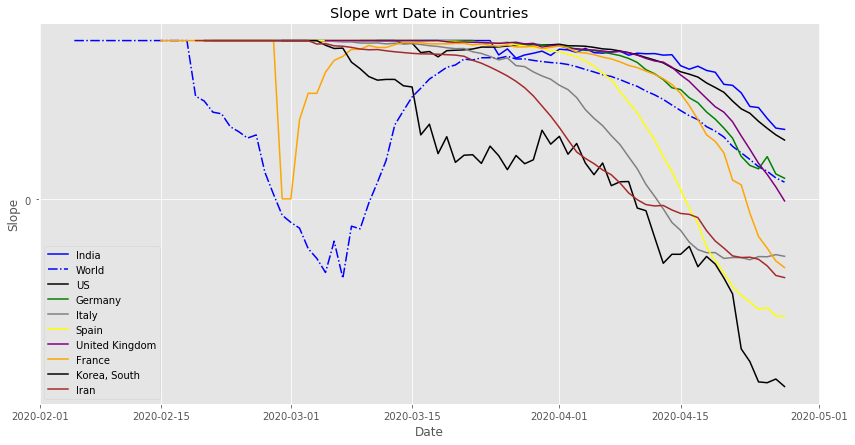

In [23]:
plotter(Slope[[c for c in Important_countries if c!='China']], 'Slope', log = 'symlog')

In [24]:
# Biweekly increase in increase of Biweekly Deaths
Growth_Increase_Biweekly = Increase_Biweekly-Increase_Biweekly.shift(14)
Growth_Increase_Biweekly = Growth_Increase_Biweekly.fillna(0).astype('int')
Growth_Increase_Biweekly[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-14,297,20299,14538,1041,-8787,-5738,161,6918,5595,-49,-1124
2020-04-15,240,15606,14401,1128,-8993,-7586,138,6039,4389,-53,-1018
2020-04-16,244,11109,15731,863,-9508,-9242,112,5394,2473,-40,-866
2020-04-17,285,7937,16235,728,-9399,-10468,1373,4306,487,-52,-749
2020-04-18,275,1098,14344,379,-8617,-11683,1351,3238,-1699,-37,-802
2020-04-19,283,-2932,13034,116,-7939,-12171,1359,2109,-2526,-32,-830
2020-04-20,214,-8245,11394,-201,-7687,-12266,1330,1399,-3919,-42,-809
2020-04-21,225,-17514,8152,-546,-6904,-12464,1335,128,-6927,-33,-808
2020-04-22,182,-23029,5300,-1153,-6240,-11772,1319,-1792,-7337,-44,-711


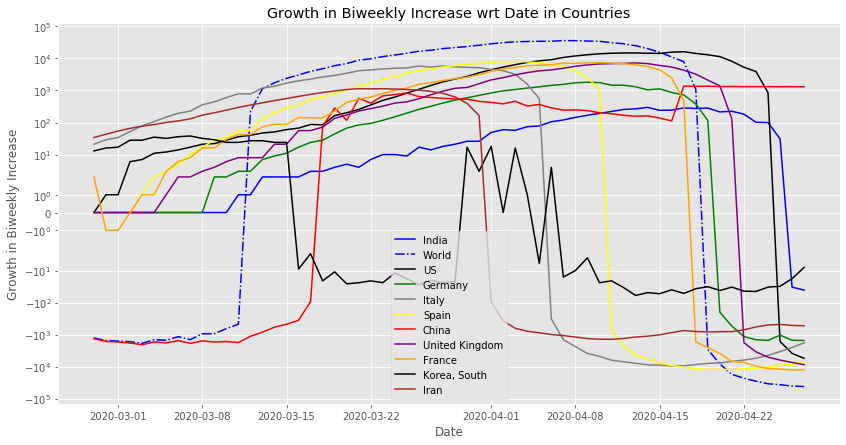

In [25]:
plotter(Growth_Increase_Biweekly.tail(60), 'Growth in Biweekly Increase', log = 'symlog')

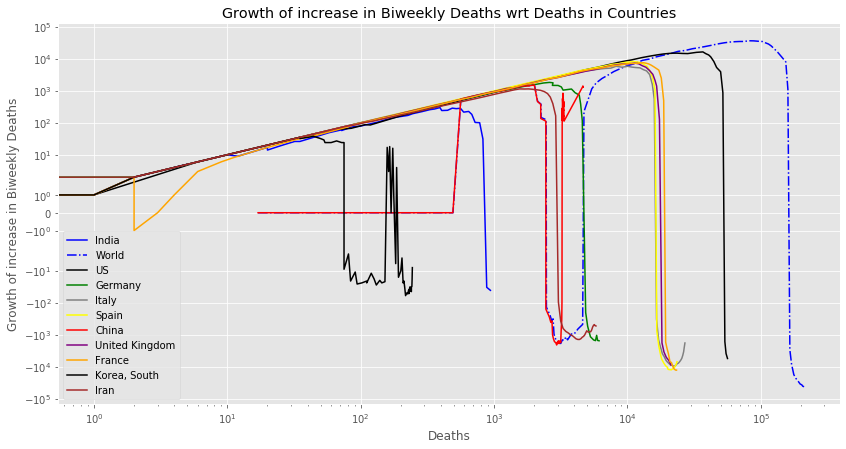

In [26]:
plot2(Deaths, Growth_Increase_Biweekly, 'Growth of increase in Biweekly Deaths', log = 'symlog')

In [27]:
Slope_growth = np.round(Growth_Increase_Biweekly/Biweekly_Deaths, 4)
Slope_growth[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-14,0.8296,0.2418,0.6618,0.4133,-1.0171,-0.5982,4.4722,0.6693,0.4580,-0.8167,-0.6297
2020-04-15,0.6916,0.1793,0.6108,0.3911,-1.0592,-0.8139,4.6000,0.5731,0.3436,-0.8833,-0.5847
2020-04-16,0.6489,0.1223,0.5826,0.2930,-1.1518,-1.0307,4.6667,0.4979,0.1972,-0.6667,-0.5067
2020-04-17,0.6884,0.0835,0.5467,0.2366,-1.1656,-1.1890,1.0481,0.3916,0.0400,-0.9286,-0.4501
2020-04-18,0.6322,0.0116,0.4741,0.1257,-1.0956,-1.4431,1.0345,0.2897,-0.1443,-0.6727,-0.5079
2020-04-19,0.6152,-0.0306,0.4199,0.0386,-1.0214,-1.5580,1.0430,0.1891,-0.2168,-0.6275,-0.5479
2020-04-20,0.4693,-0.0864,0.3639,-0.0659,-1.0126,-1.6331,1.0223,0.1253,-0.3448,-0.8400,-0.5503
2020-04-21,0.4545,-0.1848,0.2576,-0.1810,-0.9180,-1.7223,1.0261,0.0114,-0.6606,-0.7333,-0.5670
2020-04-22,0.3618,-0.2429,0.1661,-0.3935,-0.8414,-1.6999,1.0154,-0.1623,-0.6997,-1.1579,-0.5086


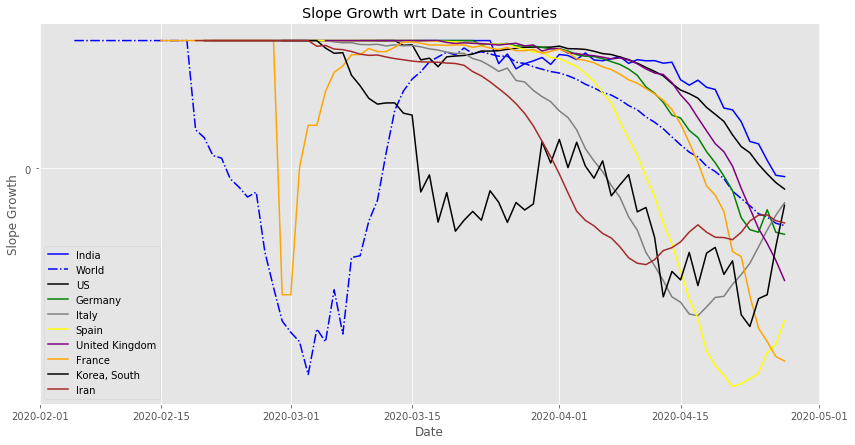

In [28]:
plotter(Slope_growth[[c for c in Important_countries if c!='China']], 'Slope Growth', log = 'symlog')

In [29]:
Biweekly_Growth = np.round(Deaths/Deaths.shift(14), 4)
Biweekly_Growth[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-14,11.2286,2.9939,6.6709,4.2503,1.6951,2.1333,1.0109,6.7646,4.4587,1.3704,1.6159
2020-04-15,6.9828,2.8445,5.9534,4.1348,1.6454,1.9930,1.0090,5.4705,3.8940,1.3636,1.5735
2020-04-16,6.2222,2.7143,5.5541,3.6603,1.5932,1.8665,1.0072,4.7023,3.3236,1.3550,1.5408
2020-04-17,6.7500,2.6173,5.1886,3.4133,1.5493,1.7862,1.3939,4.0451,2.8686,1.3218,1.5052
2020-04-18,6.0581,2.4698,4.5985,3.0880,1.5120,1.6777,1.3922,3.5875,2.5541,1.3107,1.4574
2020-04-19,5.6465,2.3791,4.2272,2.8952,1.4893,1.6180,1.3909,3.2561,2.4396,1.2787,1.4205
2020-04-20,4.3529,2.2791,3.9037,2.6862,1.4594,1.5630,1.3901,3.0734,2.2734,1.2688,1.3932
2020-04-21,4.3000,2.1565,3.4738,2.4965,1.4391,1.5153,1.3901,2.8161,2.0138,1.2344,1.3680
2020-04-22,3.8258,2.0726,3.1707,2.2473,1.4197,1.4682,1.3893,2.5525,1.9632,1.1900,1.3501


In [30]:
Reproductivity = np.round(Biweekly_Deaths/Biweekly_Deaths.shift(14), 4)
Reproductivity[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-14,11.1875,2.4547,5.8335,3.3542,0.8704,1.2094,0.4557,5.9505,3.6110,0.7407,0.9346
2020-04-15,6.3091,2.2633,5.0793,3.2332,0.8342,1.0636,0.4000,4.6114,2.9951,0.7407,0.9158
2020-04-16,5.5294,2.1064,4.7130,2.7705,0.7854,0.9421,0.3288,3.8856,2.4336,0.7692,0.9110
2020-04-17,6.1791,2.0020,4.3379,2.5472,0.7573,0.8670,17.9452,3.2030,2.0074,0.7000,0.8941
2020-04-18,5.3049,1.8390,3.7348,2.2169,0.7464,0.7658,18.3944,2.7357,1.6789,0.7333,0.8328
2020-04-19,5.0000,1.7482,3.3734,2.0148,0.7466,0.7187,22.0847,2.3926,1.5709,0.7083,0.7899
2020-04-20,3.6190,1.6426,3.0619,1.8091,0.7267,0.6810,21.3279,2.2113,1.4095,0.6667,0.7628
2020-04-21,3.5357,1.4966,2.6183,1.6229,0.7297,0.6440,24.0926,1.9497,1.1347,0.6250,0.7353
2020-04-22,3.0301,1.4108,2.3193,1.3672,0.7295,0.6214,24.9808,1.6614,1.0976,0.5135,0.7296


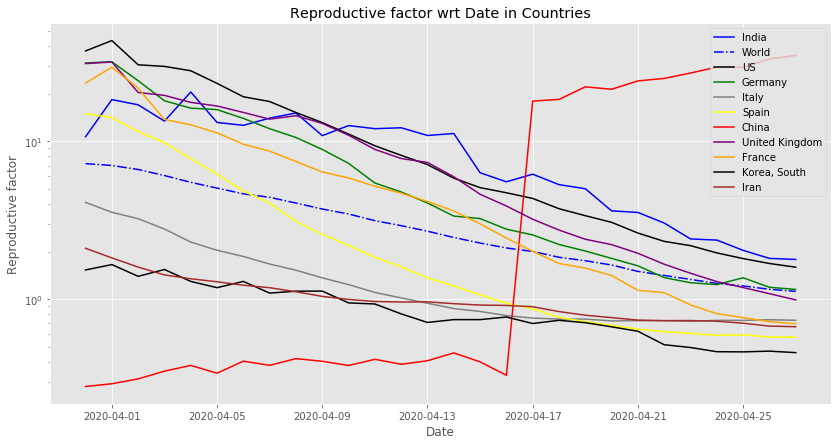

In [31]:
plotter(Reproductivity.tail(28), 'Reproductive factor', True)

In [32]:
Daily_Deaths = Deaths-Deaths.shift(1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-14,35,6542,2305,100,602,300,0,782,762,5,98
2020-04-15,12,8163,2495,510,578,652,1,765,1440,3,94
2020-04-16,43,9619,4592,248,525,607,0,865,753,4,92
2020-04-17,38,10044,3857,300,575,687,1290,848,762,1,89
2020-04-18,35,5718,1877,107,482,41,0,891,642,2,73
2020-04-19,38,5466,1997,127,433,410,0,597,399,2,87
2020-04-20,33,4932,1433,276,454,399,0,455,548,2,91
2020-04-21,53,6716,2350,171,534,430,0,828,537,1,88
2020-04-22,36,6451,2178,246,437,435,0,773,544,1,94


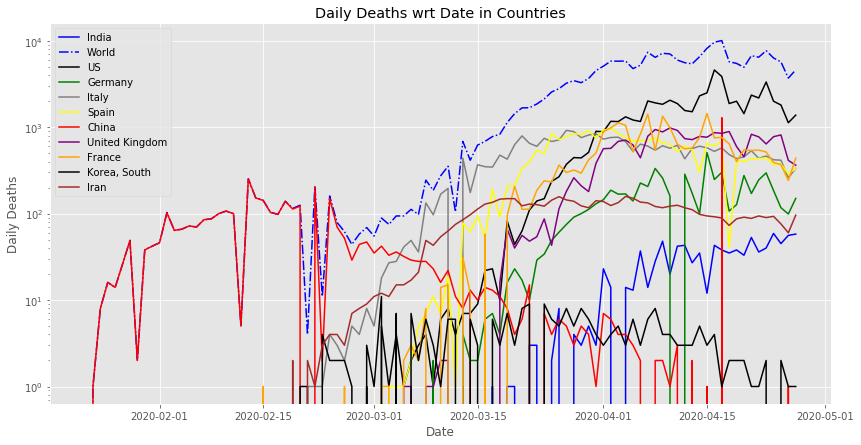

In [33]:
plotter(Daily_Deaths, 'Daily Deaths')

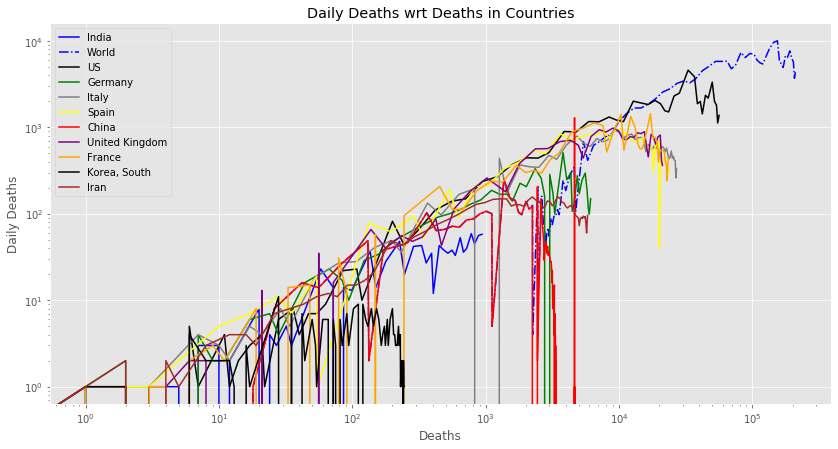

In [34]:
plot2(Deaths, Daily_Deaths, 'Daily Deaths')

In [35]:
Confirmed = np.round(Removed * Biweekly_Growth)#.astype('int')
#Confirmed = Confirmed.astype('int')
Confirmed[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,United Kingdom,France,"Korea, South",Iran
Date,,,,,,,,,,,
2020-04-14,220642.0,18872198.0,8619803.0,700024.0,1785534.0,1925943.0,169073.0,4102392.0,3510780.0,15211.0,378363.0
2020-04-15,141402.0,19091431.0,8435372.0,786439.0,1780734.0,1864252.0,168806.0,3526831.0,3346504.0,15340.0,375830.0
2020-04-16,139377.0,19523010.0,9144826.0,741577.0,1766062.0,1802572.0,168505.0,3234947.0,2981435.0,15515.0,375108.0
2020-04-17,164025.0,20139731.0,9543651.0,742734.0,1761941.0,1786379.0,323106.0,2954339.0,2682571.0,15201.0,373139.0
2020-04-18,157814.0,19710856.0,8889820.0,688470.0,1755961.0,1681307.0,322712.0,2779954.0,2470453.0,15204.0,366609.0
2020-04-19,157820.0,19637210.0,8594109.0,663869.0,1761842.0,1654648.0,322411.0,2620346.0,2408373.0,14961.0,363506.0
2020-04-20,128846.0,19373831.0,8216117.0,653015.0,1759599.0,1629584.0,322225.0,2543238.0,2306592.0,14972.0,362859.0
2020-04-21,138675.0,19055804.0,7719478.0,628244.0,1773547.0,1612431.0,322225.0,2446909.0,2097272.0,14628.0,362315.0
2020-04-22,130268.0,18982943.0,7391219.0,593175.0,1780659.0,1594245.0,322040.0,2316521.0,2097974.0,14161.0,363919.0


In [36]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

In [37]:
D = {
    'Deaths':Deaths,
    'Biweekly Deaths':Biweekly_Deaths,
    'Increase Biweekly':Increase_Biweekly,
    'GBI':Growth_Increase_Biweekly,
    'Slope Increase':Slope,
    'Slope Growth':Slope_growth ,
    'Removed':Removed,
    'Biweekly Growth':Biweekly_Growth,
    'Reproductive Factor':Reproductivity,
    'Daily Deaths':Daily_Deaths,
    'Confirmed':Confirmed
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]

In [38]:
LastDay_DF = LastDay_DF[LastDay_DF.Deaths>=700]
LastDay_DF

,Deaths,Biweekly Deaths,Increase Biweekly,GBI,Slope Increase,Slope Growth,Removed,Biweekly Growth,Reproductive Factor,Daily Deaths,Confirmed
Country,,,,,,,,,,,
Belgium,7207,3304,-86,-2968,-0.0260,-0.8983,360350,1.8465,0.9746,113,665386.0
Brazil,4603,3275,2106,1096,0.6431,0.3347,230150,3.4661,2.8015,317,797723.0
Canada,2841,2060,1359,734,0.6597,0.3563,142050,3.6376,2.9387,154,516721.0
China,4637,1292,1255,1309,0.9714,1.0132,231850,1.3862,34.9189,0,321390.0
France,23327,8341,-3615,-12690,-0.4334,-1.5214,1166350,1.5566,0.6976,437,1815540.0
Germany,6126,2932,383,-1538,0.1306,-0.5246,306300,1.9180,1.1503,150,587483.0
India,939,581,255,-41,0.4389,-0.0706,46950,2.6229,1.7822,58,123145.0
Indonesia,765,366,89,-71,0.2432,-0.1940,38250,1.9173,1.3213,22,73337.0
Iran,5806,1221,-607,-531,-0.4971,-0.4349,290300,1.2663,0.6679,96,367607.0
